In [122]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [149]:
# required imports
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [138]:
#We have connected google drive to access the dataset before running you will need to add the voting_refined_data - dataset to your drive and change file path
file_path = '/content/drive/My Drive/datasets_OSNA/voting_refined_data.csv'
data = pd.read_csv(file_path)

In [139]:
data.head()

,Party,Year,District_votes,District_percent,Alameda_votes,Alameda_percent,SantaClara_votes,SantaClara_percent,Finance_Total,Winner
0,1,2024,172408,67.7,26067,65.8,146341,68.0,6922188,1
1,0,2024,82380,32.3,13520,34.2,68860,32.0,29725,1
2,1,2022,127853,70.9,17953,68.6,109900,71.3,4020232,1
3,0,2022,52400,29.1,8214,31.4,44186,28.7,62312,1
4,1,2020,212137,71.3,53654,70.8,158483,71.6,2993343,1


In [140]:
#I split the data into training and test sets here
train_data = data[data['Year'] < 2020 ]
test_data = data[data['Year'] >=2020]

In [141]:
train_data.head()

,Party,Year,District_votes,District_percent,Alameda_votes,Alameda_percent,SantaClara_votes,SantaClara_percent,Finance_Total,Winner
6,1,2018,159105,75.3,38980,74.4,120125,75.7,3493484,1
7,0,2018,52057,24.7,13443,25.6,38614,24.3,120329,1
8,1,2016,90924,39.0,21925,37.4,68999,39.5,2387764,1
9,1,2016,142268,61.0,36605,62.6,105663,60.5,3382308,1
10,1,2014,69561,51.8,16160,50.6,53401,52.1,237432,1


In [142]:
test_data.head()

,Party,Year,District_votes,District_percent,Alameda_votes,Alameda_percent,SantaClara_votes,SantaClara_percent,Finance_Total,Winner
0,1,2024,172408,67.7,26067,65.8,146341,68.0,6922188,1
1,0,2024,82380,32.3,13520,34.2,68860,32.0,29725,1
2,1,2022,127853,70.9,17953,68.6,109900,71.3,4020232,1
3,0,2022,52400,29.1,8214,31.4,44186,28.7,62312,1
4,1,2020,212137,71.3,53654,70.8,158483,71.6,2993343,1


In [143]:
# Specify feature columns (update these with your preferred columns)
feature_columns = ['District_percent', 'Alameda_percent', 'SantaClara_percent','Finance_Total']
X_train = train_data[feature_columns]
y_train = train_data['Winner']
X_test = test_data[feature_columns]
y_test = test_data['Winner']

## **Logistic Regression**

In [144]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [145]:
# Predictions on the test set
y_pred = model.predict(X_test)

In [146]:
#model eval
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


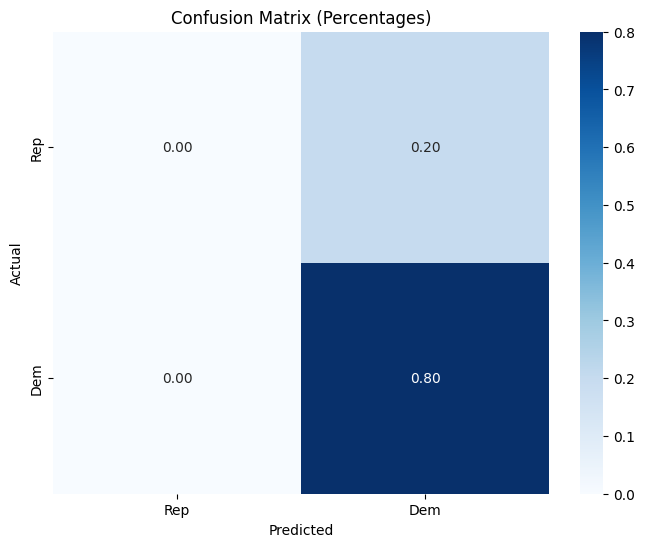

In [170]:
conf_matrix_percent = (conf_matrix *0.1)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percent, annot=True, fmt=".2f", cmap='Blues', xticklabels=['Rep', 'Dem'], yticklabels=['Rep', 'Dem'])
plt.title("Confusion Matrix (Percentages)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


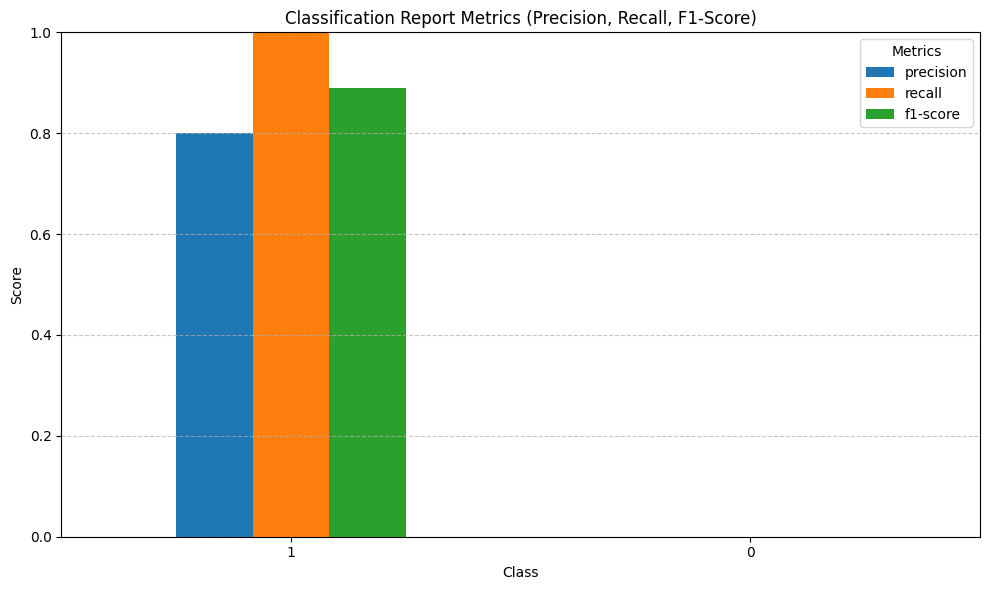

In [175]:

class_report_dict = classification_report(y_test, y_pred, output_dict=True)
class_report_df = pd.DataFrame(class_report_dict).transpose()

#  precision, recall, and F1-score for each
classes = [str(c) for c in y_test.unique()]
metrics = ['precision', 'recall', 'f1-score']
filtered_df = class_report_df.loc[classes, metrics]

# Plot
filtered_df.plot(kind='bar', figsize=(10, 6), rot=0)
plt.title("Classification Report Metrics (Precision, Recall, F1-Score)")
plt.ylabel("Score")
plt.xlabel("Class")
plt.ylim(0, 1)
plt.legend(title="Metrics")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [171]:
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.80      1.00      0.89         8

    accuracy                           0.80        10
   macro avg       0.40      0.50      0.44        10
weighted avg       0.64      0.80      0.71        10



In [172]:
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.80
